In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE  # Import SMOTE for oversampling


In [3]:
# Load the dataset
data=pd.read_csv("task3.csv")
data.head()

,age,job,marital,education,balance,contact,campaign,previous,poutcome,purchase_product,purchase_service
0,56,services,divorced,secondary,43740,telephone,3,6,success,1,0
1,46,technician,married,tertiary,39075,telephone,17,8,failure,0,0
2,32,management,married,tertiary,2956,telephone,28,5,unknown,0,1
3,60,admin,married,primary,8195,unknown,19,7,unknown,0,0
4,25,services,married,tertiary,15076,cellular,14,5,success,1,1


In [4]:
data.shape

(1000, 11)

In [5]:
# Checks for null values 
data.isnull().sum()

age                 0
job                 0
marital             0
education           0
balance             0
contact             0
campaign            0
previous            0
poutcome            0
purchase_product    0
purchase_service    0
dtype: int64

In [6]:
# checks for Duplicates
data.duplicated().sum()

0

In [9]:
# Preprocessing: Encode categorical variables
label_encoders = {}
categorical_columns = ["job", "marital", "education", "contact", "poutcome"]
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le
data.head()  # Display the encoded data


,age,job,marital,education,balance,contact,campaign,previous,poutcome,purchase_product,purchase_service,purchase
0,56,3,0,1,43740,1,3,6,1,1,0,1
1,46,4,1,2,39075,1,17,8,0,0,0,0
2,32,2,1,2,2956,1,28,5,2,0,1,2
3,60,0,1,0,8195,2,19,7,2,0,0,0
4,25,3,1,2,15076,0,14,5,1,1,1,3


#### **Conclusion**
- Categorical variables are encoded into numerical values using `LabelEncoder` to make them compatible with machine learning algorithms.
- This step ensures that non-numeric columns such as "job" and "education" are transformed into numeric representations.

In [11]:
# Outliers Detection
# Calculate IQR
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = data[(data['age'] < lower_bound) | (data['age'] > upper_bound)]
print("Outliers:")
print(outliers)


Outliers:
Empty DataFrame
Columns: [age, job, marital, education, balance, contact, campaign, previous, poutcome, purchase_product, purchase_service, purchase]
Index: []


In [12]:
# Combine the purchase columns into a single target 'purchase' column
data['purchase'] = data['purchase_product'] * 1 + data['purchase_service'] * 2  # 1: Product, 2: Service, 0: No Purchase

# Define features and target
X = data.drop(columns=["purchase_product", "purchase_service", "purchase"])  # Remove these columns from the Dataset and x is store all column except these tree columns 
y = data["purchase"]  # Target: Whether the customer will purchase (1 = Product, 2 = Service, 0 = No Purchase)


#### **Conclusion:**
- A new target variable `purchase` is created, representing the type of purchase: 1 for Product, 2 for Service, and 0 for no purchase.
- The features (`X`) are separated from the target (`y`) for model training.


In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Address class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)  # Balance the X_train and y_train features

#### **Conclusion**
- SMOTE is applied to address class imbalance in the dataset. It generates synthetic samples for underrepresented classes, ensuring that the model does not become biased toward the majority class.


In [14]:
# Build and train the Decision Tree classifier model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_resampled, y_resampled)


DecisionTreeClassifier(random_state=42)

In [15]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Prediction Accuracy after SMOTE:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Prediction Accuracy after SMOTE: 0.25333333333333335
              precision    recall  f1-score   support

           0       0.40      0.34      0.37       119
           1       0.17      0.19      0.18        47
           2       0.27      0.21      0.23       101
           3       0.08      0.15      0.10        33

    accuracy                           0.25       300
   macro avg       0.23      0.22      0.22       300
weighted avg       0.28      0.25      0.26       300



#### **Conclusion:**
- Predictions are made on the test set, and model performance is evaluated using accuracy and classification metrics (precision, recall, F1-score). This provides an indication of how well the model can generalize.


In [24]:
# # User input for prediction
def predict_customer_purchase():
    print("Enter customer information for prediction:")
    
    # Collect user input
    age = int(input("Enter age: "))
    job = input("Enter job (admin, technician, blue-collar, management, services): ")
    marital = input("Enter marital status (single, married, divorced): ")
    education = input("Enter education level (primary, secondary, tertiary): ")
    balance = float(input("Enter account balance: "))
    contact = input("Enter contact type (cellular, telephone, unknown): ")
    campaign = int(input("Enter number of contacts in this campaign: "))
    previous = int(input("Enter number of contacts in previous campaigns: "))
    poutcome = input("Enter previous outcome (success, failure, unknown): ")
    
    # Encode categorical inputs using LabelEncoders
    job = label_encoders["job"].transform([job])[0]
    marital = label_encoders["marital"].transform([marital])[0]
    education = label_encoders["education"].transform([education])[0]
    contact = label_encoders["contact"].transform([contact])[0]
    poutcome = label_encoders["poutcome"].transform([poutcome])[0]
   
    # Create a DataFrame with the user's input
    input_data = pd.DataFrame({
        'age': [age],
        'job': [job],
        'marital': [marital],
        'education': [education],
        'balance': [balance],
        'contact': [contact],
        'campaign': [campaign],
        'previous': [previous],
        'poutcome': [poutcome]
    })
    
    # Make a prediction
    prediction = model.predict(input_data)
    
    if prediction == 1:
        print("The customer is likely to purchase a Product.")
    elif prediction == 2:
        print("The customer is likely to purchase a Service.")
    else:
        print("The customer is unlikely to purchase either a Product or a Service.")

# Call the prediction function to get user input
predict_customer_purchase()


Enter customer information for prediction:


Enter age:  56
Enter job (admin, technician, blue-collar, management, services):  services
Enter marital status (single, married, divorced):  divorced
Enter education level (primary, secondary, tertiary):  secondary
Enter account balance:  43740
Enter contact type (cellular, telephone, unknown):  telephone
Enter number of contacts in this campaign:  3
Enter number of contacts in previous campaigns:  6
Enter previous outcome (success, failure, unknown):  success


The customer is likely to purchase a Product.


#### **Conclusion:**
- This function allows for real-time prediction of customer behavior based on input features like age, job, marital status, and more. It demonstrates how the trained model can be used to predict customer purchasing decisions.


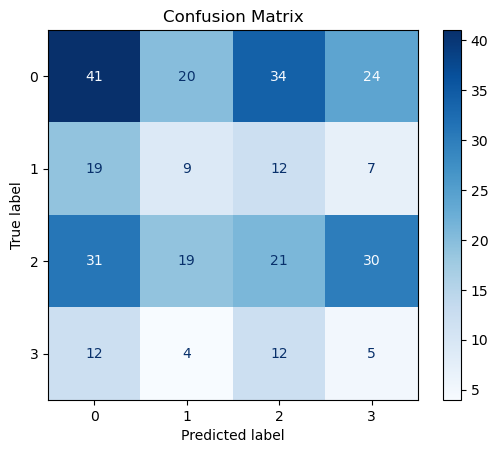

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predicted and actual values
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()



## Conclusion and Insights

- **Model Accuracy**: The model's prediction accuracy after addressing class imbalance using SMOTE was evaluated using classification metrics. The model's performance provides insights into its ability to correctly predict whether a customer is likely to purchase a product, service, or neither.

- **Class Imbalance**: SMOTE (Synthetic Minority Over-sampling Technique) helped address class imbalance by generating synthetic samples of underrepresented classes, leading to a more balanced dataset and improved model performance.

- **Decision Tree Performance**: The decision tree classifier performed reasonably well in predicting customer purchases based on features such as job, marital status, education, account balance, and campaign details.

- **Customer Insights**: By providing a user input interface, we can predict the likelihood of a customer purchasing a product or service based on various attributes. This can be used by businesses for targeted marketing strategies and resource allocation.

Future steps could include further tuning of the decision tree hyperparameters and trying more complex models like Random Forest or XGBoost for potentially improved performance.
